-0.9285714285714285 2.0928571428571425


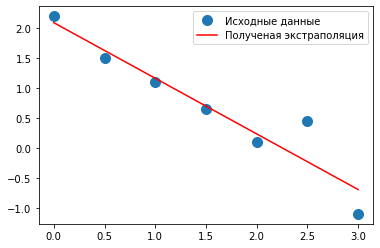

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#init
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
y = np.array([2.2, 1.5, 1.1, 0.65, 0.1, 0.45, -1.1])
A = np.vstack([x, np.ones(len(x))]).T
A

#solving on p-vector
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Полученая экстраполяция')
plt.legend()
plt.show()

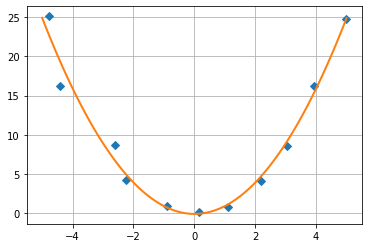

In [8]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11) - 0.5)
x = x + delta*(rand(11) - 0.5)

#print(x)
#print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1]*x_prec + s[2], '-', lw = 2)
plt.grid()

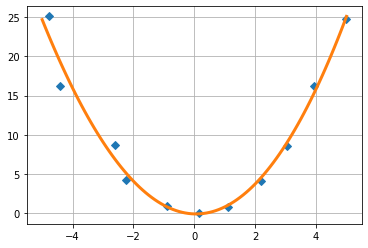

In [9]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m ,y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()

[1.00074192 1.99966086]
0.08733000462255788


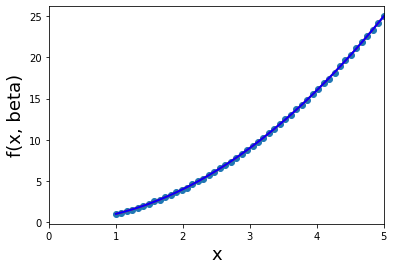

In [18]:
import scipy as sp
from scipy.optimize import curve_fit

beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"x", fontsize = 18)
ax.set_ylabel(r"f(x, beta)", fontsize = 18)
plt.show()

(30, 2)


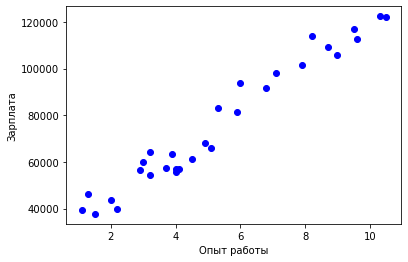

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


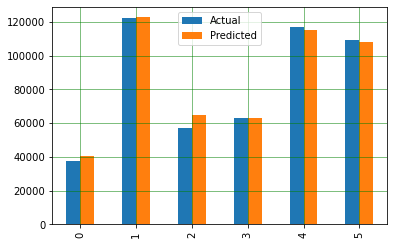

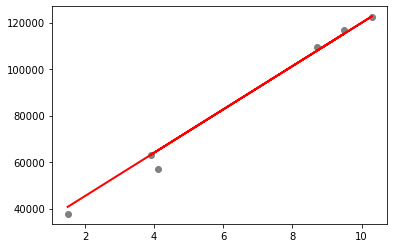

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

URL = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(URL)
dataset.head(3)

#предварительно изучим набор данных
print(dataset.shape)
dataset.describe()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = 'checker')
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)
LinearRegression()

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind = 'bar')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [35]:
URL = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset = pd.read_csv(URL)
dataset.head(3)
dataset.describe()

X = dataset[['volatile acidity', 'fixed acidity', 'citric acid']]
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train , y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Коэффициент'])
coeff_df

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Актуально': y_test, "Предсказано": y_pred})
df

,Актуально,Предсказано
1109,6,5.782357
1032,5,5.135397
1002,7,6.073760
487,6,5.469940
979,5,5.834545
...,...,...
794,6,6.123541
813,4,5.872590
1322,5,5.988208
704,4,5.243421


-0.42857142857143055 4.3809523809523805


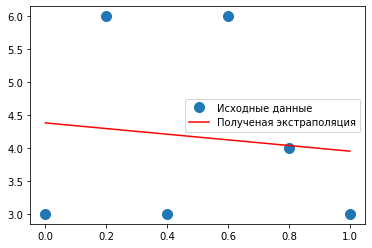

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#init
x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])
A = np.vstack([x, np.ones(len(x))]).T
A

#solving on p-vector
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Полученая экстраполяция')
plt.legend()
plt.show()